In [0]:
import numpy as np
import matplotlib.pyplot as plt

#1. Класи для 3D графіків

# Class that anables 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Class of color maps
from matplotlib import cm

# This line makes 3D plots in Jupyter Notebook interactive (uncomment to anable)
%matplotlib notebook
%matplotlib inline

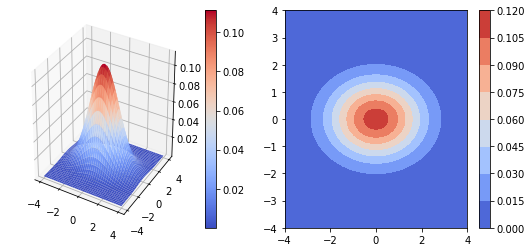

In [2]:
#2. Багатовимірний нормальний розподіл
#2.1

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook
%matplotlib inline
from scipy.stats import multivariate_normal

mean = [0, 0]
cov = [[2, 0],
       [0, 1]]

ki = multivariate_normal(mean=mean, cov=cov)

x = np.arange(-4, 4.1, 0.1)
y = np.arange(-4, 4.1, 0.1)

x1, y1 = np.meshgrid(x, y)
p = np.dstack((x1, y1))
z = ki.pdf(p)

f = plt.figure(figsize=(9, 4))

ax1 = f.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x1,y1,z, cmap=cm.coolwarm)
f.colorbar(surf)

ax2 = f.add_subplot(122)
cont = ax2.contourf(x1,y1,z, cmap=cm.coolwarm)
f.colorbar(cont)

plt.show()

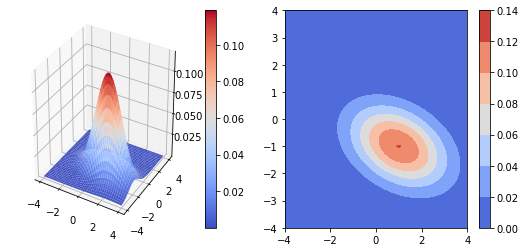

In [3]:
#2.2

mean = [1, -1]
cov = [[2, -0.5],
       [-0.5, 1]]

kci = multivariate_normal(mean=mean, cov=cov)

x = np.arange(-4, 4.1, 0.1)
y = np.arange(-4, 4.1, 0.1)

x1, y1 = np.meshgrid(x, y)
p = np.dstack((x1, y1))
z = kci.pdf(p)

fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121, projection='3d')
s = ax1.plot_surface(x1, y1, z, cmap=cm.coolwarm)
fig.colorbar(s)

ax2 = fig.add_subplot(122)
c = ax2.contourf(x1, y1, z, cmap=cm.coolwarm)
fig.colorbar(c)

plt.show()

[[ 1.00493094 -0.00289311]
 [-0.00289311  1.00493105]]


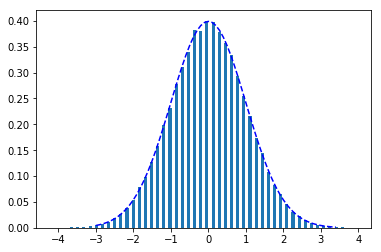

In [5]:
#3. Некорельованість не означає незалежність
#3.1

from scipy.stats import norm

X = norm()
Y = (-1, 1)


xr = X.rvs(size = 100000)
yr = np.random.choice(Y, size = 100000)
zr = xr * yr


x = np.arange(-3, 3.5, 0.1)
plt.hist(zr, density='true', bins=50, rwidth=0.5)
plt.plot(x, X.pdf(x), 'b--')
print(np.cov(xr, zr))
plt.show()

both of diagrams for X and Z:


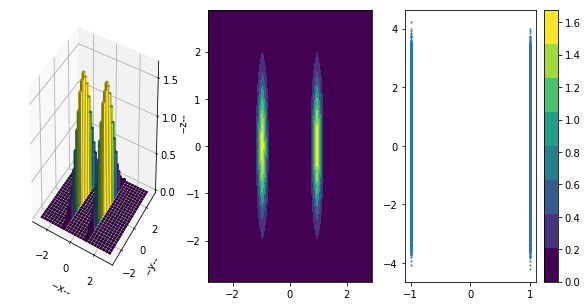

random vector (X, Z):


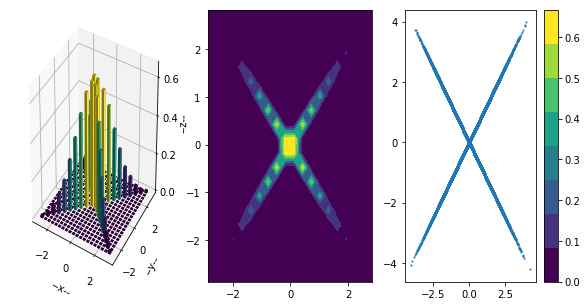

In [6]:
def graph3d(x, y, x_range, y_range, n_bins):
    f = plt.figure(figsize=(10,5))
    ax1 = f.add_subplot(131, projection='3d')
    ax1.set_xlabel("--x--")
    ax1.set_ylabel("--y--")
    ax1.set_zlabel("--z--")
    
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    hist, xedges, yedges = np.histogram2d(x, y, bins=n_bins, range=[x_range, y_range])

    xpos1, ypos1 = np.meshgrid(xedges[:-1] + 0.125, yedges[:-1] + 0.125, indexing="ij")
    xpos = xpos1.ravel()
    ypos = ypos1.ravel()
    zpos = 0
    
    
    dx = dy = 0.2 * np.ones_like(zpos)
    dz = hist.ravel()
    x_length = (x_range[1] - x_range[0]) / n_bins
    y_length = (y_range[1] - y_range[0]) / n_bins
    dz_normed = dz / (100000 * x_length * y_length)

    colors = cm.get_cmap('viridis', 8)

    ax1.bar3d(xpos, ypos, zpos, dx, dy, dz_normed, color=colors(dz_normed / dz_normed.max()), zsort='average')

    colourMap = plt.cm.ScalarMappable(cmap=colors)
    colourMap.set_array(dz_normed)
    colBar = plt.colorbar(colourMap)
    
    normed_hist = hist / (100000 * x_length * y_length)
    ax2.contourf(xpos1, ypos1, normed_hist, cmap=colors)
    
    ax3.plot(x, y, 'o', markersize=1)
    plt.show()
 

# X and Z 
tmp_x = np.zeros(100000)-1

print("both of diagrams for X and Z:")
graph3d(np.hstack((tmp_x, tmp_x+2)), np.hstack((xr, zr)), x_range=[-3, 3], y_range=[-3, 3], n_bins=25)

print('random vector (X, Z):')
graph3d(xr, zr, x_range=[-3, 3], y_range=[-3, 3], n_bins=20)

both of diagrams for Y and Z:


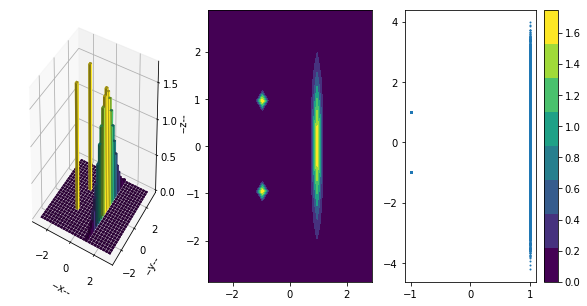

random vector (Y, Z)


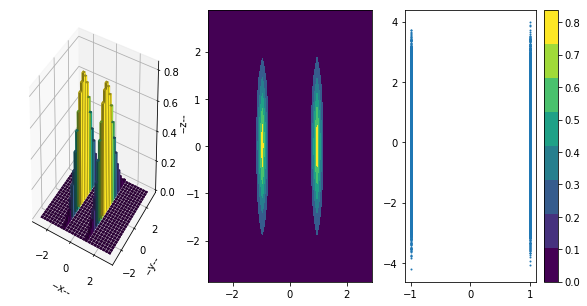

In [7]:
# Y and Z
tmp_x2 = np.zeros(100000)+1
tmp_x1 = np.zeros(20000)-1

print("both of diagrams for Y and Z:")
graph3d(np.hstack((tmp_x1, tmp_x2)), np.hstack((yr[:20000], zr)), x_range=[-3, 3], y_range=[-3, 3], n_bins=25)


print("random vector (Y, Z)")
graph3d(yr, zr, x_range=[-3, 3], y_range=[-3, 3], n_bins=25)

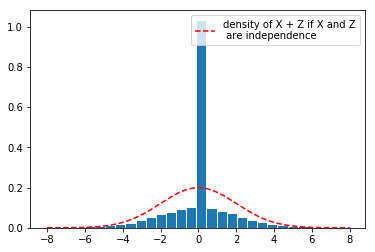

In [8]:
tmp_rvs = xr + zr
plt.hist(tmp_rvs, rwidth=0.9, bins=30, density=True)

x = np.arange(-8, 8.1, 0.1)
tmp_rv = norm(0, 2)
plt.plot(x, tmp_rv.pdf(x), 'r--', label="density of X + Z if X and Z\n are independence")
plt.legend()
plt.show()

("Pearson's correlation coefficient:", 0.0030189603989331415)
('Stearmanr correlation coefficient:', 0.0020391766391639177)


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 720x360 with 2 Axes>

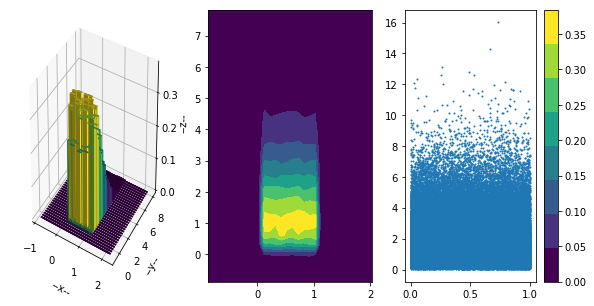

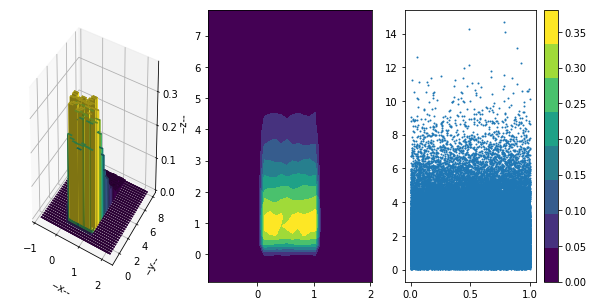

In [10]:
from scipy.stats import expon, gamma, beta, uniform
from scipy.stats.mstats import pearsonr, spearmanr


xi1 = expon(0, 1)
xi2 = expon(0, 1)

xi1_rvs = xi1.rvs(size=  100000)      
xi2_rvs = xi2.rvs(size= 100000)

zeta1 = xi1_rvs / (xi1_rvs + xi2_rvs)
zeta2 = xi1_rvs + xi2_rvs

print("Pearson's correlation coefficient:", pearsonr(zeta1, zeta2)[0])
print("Stearmanr correlation coefficient:", spearmanr(zeta1, zeta2)[0])

# plotting
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(zeta1, bins=25, rwidth=0.9, density=True)
ax2.hist(zeta2, bins=50, rwidth=0.9, density=True)

x1 = np.arange(-0.5, 1.5, 0.01)
x2 = np.arange(0, 10.1, 0.01)
ax1.plot(x1, uniform.pdf(x1, loc=0, scale=1))     
ax2.plot(x2, gamma.pdf(x2, 2, loc=0, scale=1))

ax1.set_title("histogram for zeta1 and density of U(0, 1)")
ax2.set_title("histogram for zeta2 and density of Г(2)")

plt.show()

eta1 = uniform.rvs(0, 1, size= 100000)
eta2 = gamma.rvs(a=2, loc=0, scale=1, size= 100000)
graph3d(eta1, eta2, x_range=[-1, 2], y_range=[-1, 8], n_bins=30)

graph3d(zeta1, zeta2, x_range=[-1, 2], y_range=[-1, 8], n_bins=30)